## Plotting an appendix work

Verifying the third condition in central limit theorems.

This can be computationally intensive depending on the size of your simulation files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc('font',size=14)

In [33]:
first_idx = 1
last_idx = 12
i= str(first_idx)
size = '400'
Ne = '10000'
cM = '3.0'
filein = '../data/signmc' + i + '-samplesize' + size + '-effsize' + Ne + '-length' + cM + '.tsv'
num_quantiles = 9

In [34]:
f = open(filein)
datadict = dict()
for j in range(5):
    row = f.readline().strip().split('=')
    datadict[row[0]] = float(row[1])
f.close()
print(datadict)
cut = datadict['E'] - datadict['q']
print(cut)
table = pd.read_csv(filein,
                    sep='\t',
                    skiprows=6
                   )
table['ones'] = 1

{'N': 10000.0, 'n': 400.0, 'w': 0.03, 'E': 531.7803660565723, 'q': 0.0016638935108153079}
531.7787021630616


In [35]:
datadict['q']*(2*datadict['n']*(2*datadict['n']-1)/2)

531.7803660565723

In [27]:
for i in range(first_idx+1,last_idx+1):
    i = str(i)
    filein = '../data/signmc' + i + '-samplesize' + size + '-effsize' + Ne + '-length' + cM + '.tsv'
    nexttable = pd.read_csv(filein,
                        sep='\t',
                        skiprows=6
                       )
    nexttable['ones'] = 1
    table = pd.concat((table,nexttable))


In [28]:
tableless = table[table['num_tracts'] < cut]
tablemore = table[table['num_tracts'] >= cut]
del table
print( tablemore['if_singleton'].sum() / tablemore.shape[0] - datadict['q'])
print( tableless['if_singleton'].sum() / tableless.shape[0] - datadict['q'])
tablemore['bins'] = pd.qcut(tablemore['num_tracts'], int(num_quantiles/2), precision=0)
tableless['bins'] = pd.qcut(tableless['num_tracts'], int(num_quantiles/2), precision=0)
tablelessgroup = tableless.groupby(by=['bins']).sum()
del tableless
tablelessgroup['expected_value'] = tablelessgroup['if_singleton'] / tablelessgroup['ones']
tablelessgroup['diff'] = tablelessgroup['expected_value'] - datadict['q']
tablelessgroup['Bins'] = tablelessgroup.index
tablemoregroup = tablemore.groupby(by=['bins']).sum()
del tablemore
tablemoregroup['expected_value'] = tablemoregroup['if_singleton'] / tablemoregroup['ones']
tablemoregroup['diff'] = tablemoregroup['expected_value'] - datadict['q']
tablemoregroup['Bins'] = tablemoregroup.index
tablegroup = pd.concat((tablelessgroup,tablemoregroup))
del tablelessgroup
del tablemoregroup

0.00017233661224347243
-0.00016552478672200157


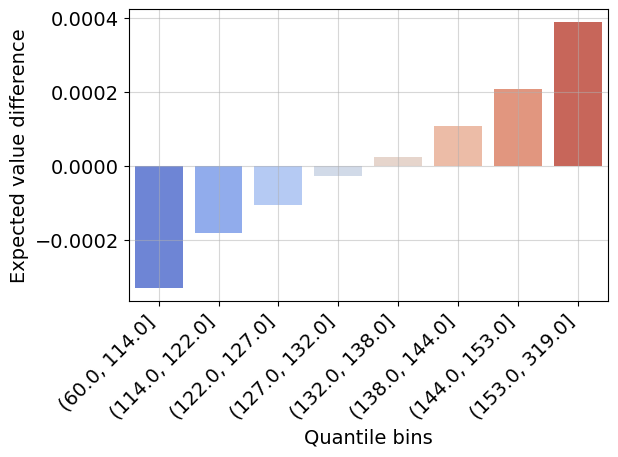

In [29]:
ax = sns.barplot(tablegroup,
                 x='Bins',
                 y='diff',
                 palette='coolwarm'
           )
ax.set_xticklabels(labels=tablegroup['Bins'].unique(),
                   rotation=45, 
                   ha='right')
plt.xlabel('Quantile bins')
plt.ylabel('Expected value difference')
plt.grid(alpha=0.5)
# plt.axvline(int(num_quantiles/2),color='k',linestyle='dotted')
plt.tight_layout()
# plt.savefig('v2-signmc-size200.png')
# plt.savefig('v2-signmc-size200.tiff')

In [24]:
try:
    del table
    del tableless
    del tablemore
    del tablelessgroup
    del tablemoregroup
except:
    pass